## Data wrangling
we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In [1]:
import pandas as pd
import numpy as np

Data Analysis

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [3]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:

In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Calculate the number of launches on each site

Number of launches per site:
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


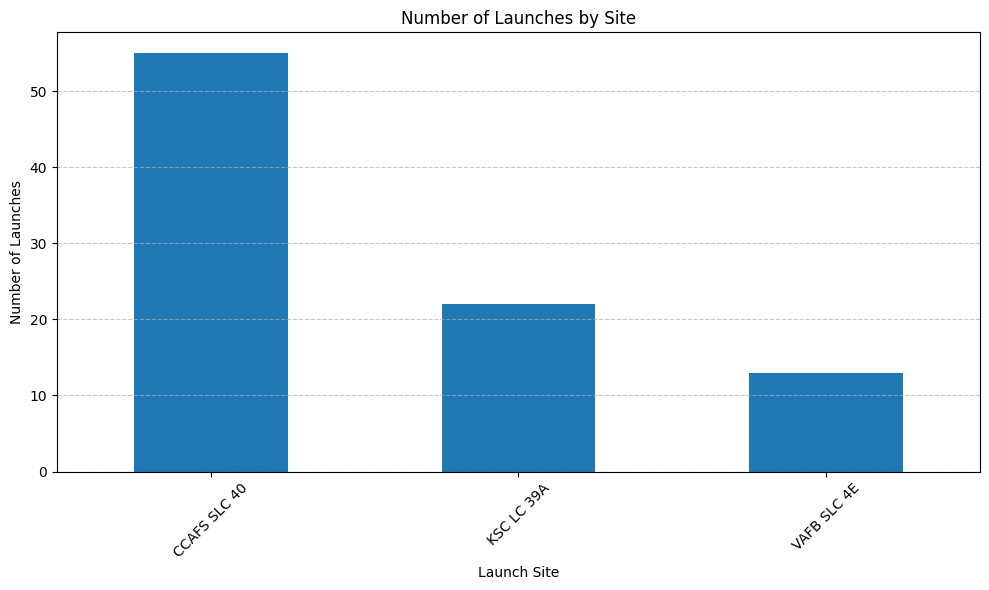

In [5]:
# Calculate the number of launches on each site
launch_site_counts = df['LaunchSite'].value_counts()
print("Number of launches per site:")
print(launch_site_counts)

# Optional: Visualize the results with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
launch_site_counts.plot(kind='bar')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by Site')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Number of launches per orbit type:
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

Percentage of launches per orbit type:
Orbit
GTO      30.00
ISS      23.33
VLEO     15.56
PO       10.00
LEO       7.78
SSO       5.56
MEO       3.33
ES-L1     1.11
HEO       1.11
SO        1.11
GEO       1.11
Name: proportion, dtype: float64


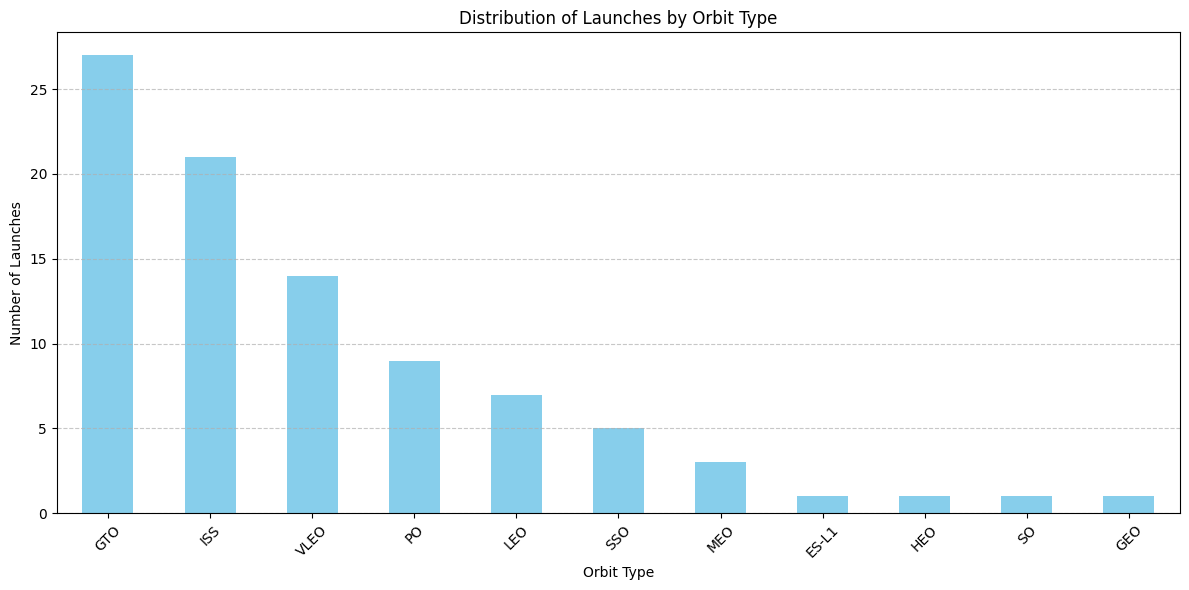

In [6]:
# Calculate the number of launches for each orbit type
orbit_counts = df['Orbit'].value_counts()
print("Number of launches per orbit type:")
print(orbit_counts)

# Calculate the percentage of launches for each orbit type
orbit_percentage = df['Orbit'].value_counts(normalize=True) * 100
print("\nPercentage of launches per orbit type:")
print(orbit_percentage.round(2))

# Visualize the results with a bar chart
plt.figure(figsize=(12, 6))
orbit_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.title('Distribution of Launches by Orbit Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Number of occurrences for each mission outcome:
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

Percentage of each mission outcome:
Outcome
True ASDS      45.56
None None      21.11
True RTLS      15.56
False ASDS      6.67
True Ocean      5.56
False Ocean     2.22
None ASDS       2.22
False RTLS      1.11
Name: proportion, dtype: float64


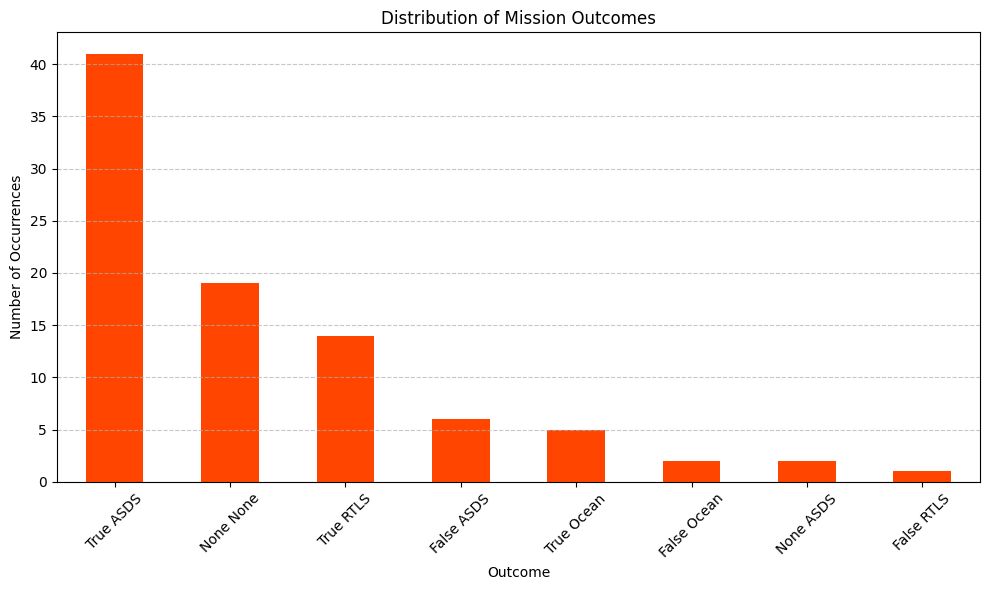

In [7]:
# Calculate the number of each mission outcome
landing_outcomes = df['Outcome'].value_counts()
print("Number of occurrences for each mission outcome:")
print(landing_outcomes)

# Calculate the percentage of each mission outcome
landing_percentage = df['Outcome'].value_counts(normalize=True) * 100
print("\nPercentage of each mission outcome:")
print(landing_percentage.round(2))

# Visualize the results with a bar plot
plt.figure(figsize=(10, 6))
landing_outcomes.plot(kind='bar', color='orangered')
plt.xlabel('Outcome')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Mission Outcomes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. None ASDS and None None these represent a failure to land.

In [8]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [9]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Create a landing outcome label from Outcome column

In [10]:
# Create landing outcome labels (0 for failure, 1 for success)
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

# You can verify the first few elements
print("First 10 landing class values:", landing_class[:10])
print(f"Total successful landings: {sum(landing_class)}")
print(f"Total unsuccessful landings: {len(landing_class) - sum(landing_class)}")

# Optionally, add this as a new column to the dataframe
df['Class'] = landing_class

First 10 landing class values: [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
Total successful landings: 60
Total unsuccessful landings: 30


In [11]:
df["Class"].mean()

0.6666666666666666

In [12]:
# Save the DataFrame to a CSV file
df.to_csv(r"C:\Users\moroi\OneDrive\Desktop\dataset_part_2.csv", index=False)
print("File saved successfully at: C:\\Users\\moroi\\OneDrive\\Desktop\\dataset_part_2.csv")

File saved successfully at: C:\Users\moroi\OneDrive\Desktop\dataset_part_2.csv


Success rate for CCAFS SLC 40: 60.00%
Total launches: 55
Successful launches: 33
Failed launches: 22


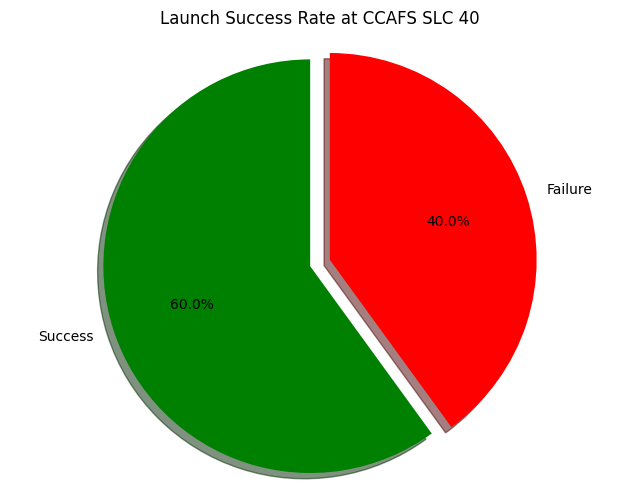

In [13]:
# Filter the dataframe for CCAFS SLC 40 launches
ccafs_df = df[df['LaunchSite'] == 'CCAFS SLC 40']

# Calculate the success rate
success_rate = ccafs_df['Class'].mean()

# Get counts of successful and failed launches
successful_launches = ccafs_df['Class'].sum()
total_launches = len(ccafs_df)
failed_launches = total_launches - successful_launches

print(f"Success rate for CCAFS SLC 40: {success_rate:.2%}")
print(f"Total launches: {total_launches}")
print(f"Successful launches: {successful_launches}")
print(f"Failed launches: {failed_launches}")

# Visualize the success rate with a pie chart
plt.figure(figsize=(8, 6))
plt.pie([successful_launches, failed_launches], 
	labels=['Success', 'Failure'],
	autopct='%1.1f%%',
	colors=['green', 'red'],
	explode=(0.1, 0),
	startangle=90,
	shadow=True)
plt.title('Launch Success Rate at CCAFS SLC 40')
plt.axis('equal')
plt.show()

Overall success rate for all launches: 66.67%
Total launches: 90
Successful launches: 60
Failed launches: 30


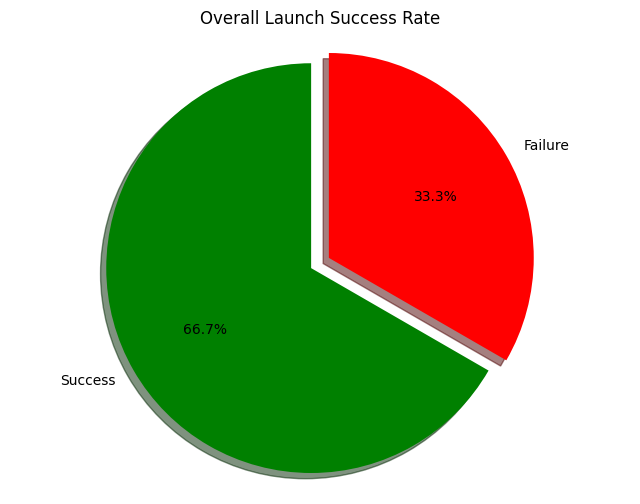

In [14]:
# Calculate the overall success rate for all launches
success_rate_all = df['Class'].mean()

# Get counts of successful and failed launches
successful_launches_all = df['Class'].sum()
total_launches_all = len(df)
failed_launches_all = total_launches_all - successful_launches_all

print(f"Overall success rate for all launches: {success_rate_all:.2%}")
print(f"Total launches: {total_launches_all}")
print(f"Successful launches: {successful_launches_all}")
print(f"Failed launches: {failed_launches_all}")

# Visualize the overall success rate with a pie chart
plt.figure(figsize=(8, 6))
plt.pie([successful_launches_all, failed_launches_all], 
	labels=['Success', 'Failure'],
	autopct='%1.1f%%',
	colors=['green', 'red'],
	explode=(0.1, 0),
	startangle=90,
	shadow=True)
plt.title('Overall Launch Success Rate')
plt.axis('equal')
plt.show()

Number of launches to geosynchronous orbit: 28

Breakdown by orbit type:
Orbit
GTO    27
GEO     1
Name: count, dtype: int64


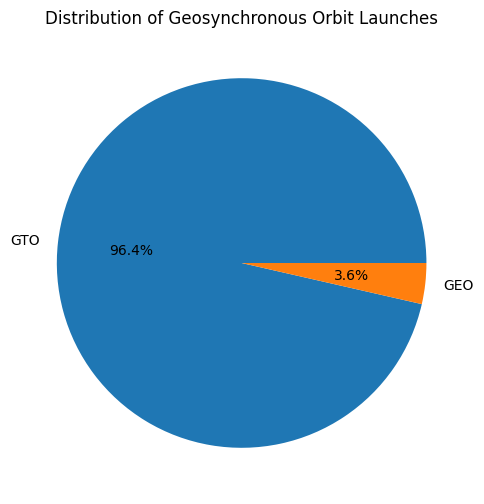

In [15]:
# Count launches to geosynchronous orbits (GEO and GTO)
geo_launches = df[df['Orbit'].isin(['GEO', 'GTO'])].shape[0]

# Display the results
print(f"Number of launches to geosynchronous orbit: {geo_launches}")
print("\nBreakdown by orbit type:")
geo_breakdown = df[df['Orbit'].isin(['GEO', 'GTO'])]['Orbit'].value_counts()
print(geo_breakdown)

# Optional: visualize with a pie chart
plt.figure(figsize=(8, 6))
geo_breakdown.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Geosynchronous Orbit Launches')
plt.ylabel('')
plt.show()

Number of missions successfully landed on a drone ship: 41
Percentage of all launches: 45.56%


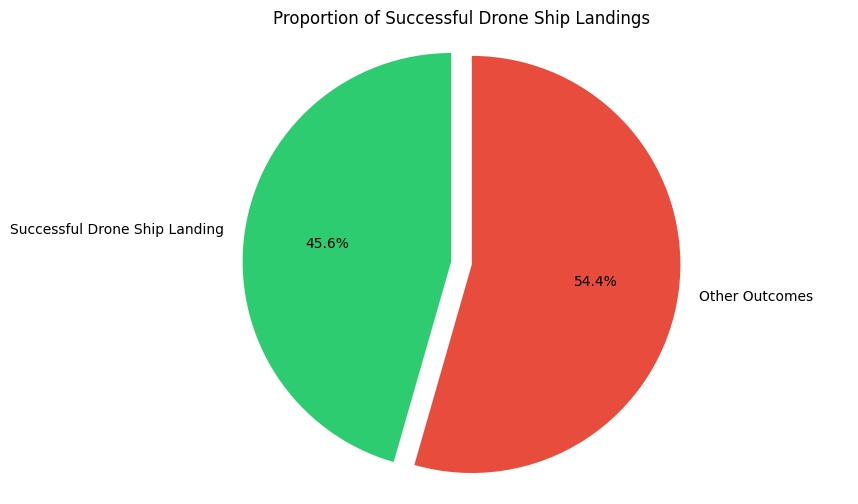

In [16]:
# Find how many missions successfully landed on a drone ship
drone_ship_success = landing_outcomes['True ASDS']
print(f"Number of missions successfully landed on a drone ship: {drone_ship_success}")

# Optional: Calculate as a percentage of all launches
drone_ship_success_percentage = (drone_ship_success / len(df)) * 100
print(f"Percentage of all launches: {drone_ship_success_percentage:.2f}%")

# Visualize with a pie chart
plt.figure(figsize=(10, 6))
labels = ['Successful Drone Ship Landing', 'Other Outcomes']
sizes = [drone_ship_success, len(df) - drone_ship_success]
colors = ['#2ecc71', '#e74c3c']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title('Proportion of Successful Drone Ship Landings')
plt.axis('equal')
plt.show()